In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.layers import Dropout


In [2]:
!pip install kaggle


In [3]:
!chmod 600 /content/kaggle-2.json



In [4]:
!kaggle datasets download -d thedrcat/daigt-v2-train-dataset

Dataset URL: https://www.kaggle.com/datasets/thedrcat/daigt-v2-train-dataset
License(s): other
 70% 20.0M/28.5M [00:00<00:00, 75.6MB/s]
100% 28.5M/28.5M [00:00<00:00, 84.1MB/s]


In [5]:

!unzip daigt-v2-train-dataset.zip

Archive:  daigt-v2-train-dataset.zip
  inflating: train_v2_drcat_02.csv   


In [6]:
train_essays = pd.read_csv("/content/train_v2_drcat_02.csv")

train_essays.rename(columns = {"label": "generated"}, inplace = True)
train_essays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44868 entries, 0 to 44867
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   text           44868 non-null  object
 1   generated      44868 non-null  int64 
 2   prompt_name    44868 non-null  object
 3   source         44868 non-null  object
 4   RDizzl3_seven  44868 non-null  bool  
dtypes: bool(1), int64(1), object(3)
memory usage: 1.4+ MB


Essays generated by humans: 17497
Essays generated by LLMs: 27371


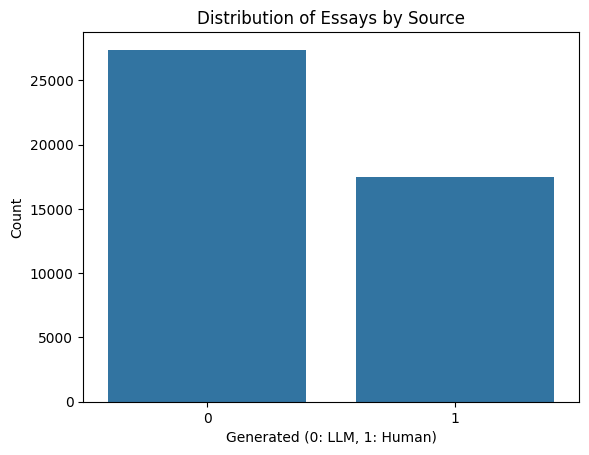

In [8]:
generated_by_human = (train_essays["generated"] == 1).sum()
generated_by_llm = (train_essays["generated"] == 0).sum()

# Print the counts
print(f"Essays generated by humans: {generated_by_human}")
print(f"Essays generated by LLMs: {generated_by_llm}")

# Create a count plot
sns.countplot(train_essays, x="generated")
plt.title("Distribution of Essays by Source")
plt.xlabel("Generated (0: LLM, 1: Human)")
plt.ylabel("Count")
plt.show()

In [7]:
train_essays.drop("RDizzl3_seven",axis = 1, inplace = True)

In [8]:
train_essays.head()

,text,generated,prompt_name,source
0,Phones\n\nModern humans today are always on th...,0,Phones and driving,persuade_corpus
1,This essay will explain if drivers should or s...,0,Phones and driving,persuade_corpus
2,Driving while the use of cellular devices\n\nT...,0,Phones and driving,persuade_corpus
3,Phones & Driving\n\nDrivers should not be able...,0,Phones and driving,persuade_corpus
4,Cell Phone Operation While Driving\n\nThe abil...,0,Phones and driving,persuade_corpus


In [9]:
#tokenization
tokenizer = Tokenizer(num_words = 10000, oov_token = "<OOV>")
tokenizer.fit_on_texts(train_essays["text"])
sequences = tokenizer.texts_to_sequences(train_essays["text"])
print(sequences)

In [10]:
import pickle

with open('Models/tokenizer.pkl', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

FileNotFoundError: [Errno 2] No such file or directory: 'Models/tokenizer.pkl'

In [11]:
padded_sequences = pad_sequences(sequences, padding = "post", maxlen = 10)
print(padded_sequences)

[[   2 4663   78 ...    3  309  428]
 [   5  428  551 ...   54   47 1562]
 [ 217  666   45 ...  438    4   98]
 ...
 [ 275   83  712 ...  570   47  197]
 [ 712   13   11 ...  570   47  197]
 [ 158   86  712 ...  570   47  197]]


In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.layers import Dropout

model = Sequential([
    Embedding(input_dim=10000, output_dim=16, input_length=10),
    LSTM(128, return_sequences=True),
    Dropout(0.5),  # Dropout with 50% rate
    LSTM(64),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])


# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

# 1st iteration of model = 80 % accuracy

In [14]:
model.fit(padded_sequences, train_essays["generated"], epochs = 10)

Epoch 1/10
1403/1403 ━━━━━━━━━━━━━━━━━━━━ 45s 32ms/step - accuracy: 0.9210 - loss: 0.2056
Epoch 2/10
1403/1403 ━━━━━━━━━━━━━━━━━━━━ 78s 29ms/step - accuracy: 0.9317 - loss: 0.1787
Epoch 3/10
1403/1403 ━━━━━━━━━━━━━━━━━━━━ 41s 29ms/step - accuracy: 0.9433 - loss: 0.1568
Epoch 4/10
1403/1403 ━━━━━━━━━━━━━━━━━━━━ 39s 28ms/step - accuracy: 0.9446 - loss: 0.1444
Epoch 5/10
1403/1403 ━━━━━━━━━━━━━━━━━━━━ 41s 29ms/step - accuracy: 0.9525 - loss: 0.1288
Epoch 6/10
1403/1403 ━━━━━━━━━━━━━━━━━━━━ 82s 30ms/step - accuracy: 0.9558 - loss: 0.1214
Epoch 7/10
1403/1403 ━━━━━━━━━━━━━━━━━━━━ 39s 28ms/step - accuracy: 0.9587 - loss: 0.1108
Epoch 8/10
1403/1403 ━━━━━━━━━━━━━━━━━━━━ 42s 29ms/step - accuracy: 0.9615 - loss: 0.1014
Epoch 9/10
1403/1403 ━━━━━━━━━━━━━━━━━━━━ 44s 31ms/step - accuracy: 0.9656 - loss: 0.0949
Epoch 10/10
1403/1403 ━━━━━━━━━━━━━━━━━━━━ 43s 31ms/step - accuracy: 0.9693 - loss: 0.0805


In [15]:
model.save('/content/Models/model2.h5')

In [16]:
model.save('/content/Models/model2.keras')

# using bert tokenizer

In [ ]:
from transformers import BertTokenizer, TFBertModel
texts = train_essays["text"].tolist()

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
inputs = tokenizer(texts, padding=True, truncation=True, return_tensors="tf")


In [ ]:
input_ids = inputs['input_ids']


# feeding bert tokenizer output to lstm - overfitting

In [18]:
# Assuming you want to use an embedding layer
vocab_size = tokenizer.vocab_size  # Vocabulary size of BERT (usually 30522)
embedding_dim = 768  # Typically 768 for BERT-base

# Define the LSTM model
model = tf.keras.Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=input_ids.shape[1]),
    LSTM(128, return_sequences=False),
    Dense(1, activation='sigmoid')  # Assuming binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(input_ids, train_essays["generated"], epochs=3, batch_size=32)

AttributeError: 'Tokenizer' object has no attribute 'vocab_size'

# Feeding bert tokenizer output to bert model then to lstm model for classifications

In [ ]:
bert_model = TFBertModel.from_pretrained('bert-base-uncased')
bert_output = bert_model(input_ids=inputs['input_ids'], attention_mask=inputs['attention_mask'], batch_size = 8)

# `last_hidden_state` has shape (batch_size, sequence_length, hidden_size)
last_hidden_state = bert_output.last_hidden_state

# Step 3: Define LSTM Model
lstm_units = 128
lstm_layer = tf.keras.layers.LSTM(lstm_units, return_sequences=False)(last_hidden_state)

# Step 4: Add a Dense Layer for Classification (if required)
output = tf.keras.layers.Dense(1, activation='sigmoid')(lstm_layer)

# Step 5: Compile the Model
model = tf.keras.Model(inputs=[bert_model.input], outputs=output)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Step 6: Train the Model
model.fit([inputs['input_ids'], inputs['attention_mask']], labels, epochs=3, batch_size=32)

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

ValueError: The following keyword arguments are not supported by this model: ['batch_size'].

In [22]:
saved_model = tf.keras.models.load_model("/content/Models/model1.keras")

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 13 variables whereas the saved optimizer has 24 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [24]:
saved_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 10, 16)              │           1,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 10, 128)             │          74,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 10, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 254,724 (995.02 KB)

 Trainable params: 127,361 (497.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 127,363 (497.52 KB)

In [25]:
saved_model.predict("hello what is this text")

ValueError: Unrecognized data type: x=hello what is this text (of type <class 'str'>)

In [25]:

# with open('/content/Models/tokenizer.pkl', 'rb') as handle:
#     tokenizer = pickle.load(handle)
# # Define preprocessing
def preprocess(text):
  if isinstance(text, str):
        text = [text]
      # Tokenize, pad, etc.
  sequences = tokenizer.texts_to_sequences(text)
  padded_sequences = pad_sequences(sequences, padding = "post", maxlen = 10)
  return padded_sequences

# Define model
model = tf.keras.models.load_model("/content/Models/model2.keras")

# Save the entire workflow
def predict(input_text):
    preprocessed_text = preprocess(input_text)
    prediction = model.predict(preprocessed_text)
    return prediction
predict("hello my name is pranjal. how are you")

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 13 variables whereas the saved optimizer has 24 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


array([[0.999976]], dtype=float32)

In [ ]:
def classify(probability):
    threshold = 0.5  # You can adjust this threshold if needed
    if probability >= threshold:
        return "Human generated text"
    else:
        return "LLM generated text"

In [20]:
!chmod 600 content/kaggle-2.json

chmod: cannot access 'content/kaggle-2.json': No such file or directory


In [17]:
!kaggle competitions download -c llm-detect-ai-generated-text

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 7, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 407, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.config/kaggle. Or use the environment method. See setup instructions at https://github.com/Kaggle/kaggle-api/


In [22]:
test_df = pd.read_csv("/content/test_essays.csv")

In [23]:
test_df.head()

,id,prompt_id,text
0,0000aaaa,2,Aaa bbb ccc.
1,1111bbbb,3,Bbb ccc ddd.
2,2222cccc,4,CCC ddd eee.


In [27]:
predict(test_df["text"])

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 522ms/step


array([[0.9999996],
       [0.9999995],
       [0.9999995]], dtype=float32)

In [28]:
sub_df = pd.DataFrame()
sub_df["id"] = test_df["id"]

In [29]:
sub_df["generated"] = predict(test_df["text"])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


In [30]:
sub_df.head()

,id,generated
0,0000aaaa,1.0
1,1111bbbb,1.0
2,2222cccc,1.0


In [31]:
sub_df.to_csv("submission.csv", index = False)